In [1]:
import sys
import yaml
import os
from dotenv import dotenv_values
sys.path.append("../")
settings_file = "../reuma_settings.yaml"

with open(settings_file) as stream:
    config = yaml.safe_load(stream)

wd = os.path.abspath(os.path.dirname(settings_file))
os.chdir(wd)

AWS_SECRETS = config.get("bedrock").get("secrets-path")
GRADIO_SECRETS = config.get("gradio").get("secrets-path")

In [2]:
from bedrock_inference.bedrock import aws_login_mfa
mfa_token = input("Enter MFA token: ")
session = aws_login_mfa(arn=dotenv_values(AWS_SECRETS).get("AWS_ARN_MFA_DEVICE"),
                        aws_access_key_id=dotenv_values(AWS_SECRETS).get("AWS_ACCESS_KEY_ID"),
                        aws_secret_access_key=dotenv_values(AWS_SECRETS).get("AWS_SECRET_ACCESS_KEY"),
                        token=mfa_token,
                        duration=3600)

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from rags import Rag
rag = Rag(session=session,
          model=config.get("bedrock").get("model-id"),
          embedder=config.get("bedrock").get("embedder-id"),
          vector_store=config.get("vector-db-path"),
          region=config.get("bedrock").get("region"))

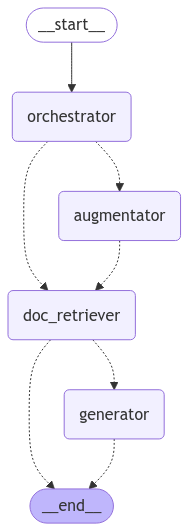

In [13]:
from IPython.display import Image, display
display(Image(rag.get_image()))

In [15]:
question = input("Enter a question: ")
rag.invoke({"question": question, "additional_context": "", "query_aug": False})

2025-02-24 12:52:23,284 - langchain_aws.llms.bedrock - INFO - Using Bedrock Invoke API to generate response


{'question': 'come si classifica la gotta?',
 'context': [Document(id='24aaa6c9-0277-47a0-aad8-e52cddd8138a', metadata={'source': '/Users/detsutut/Repositories/dheal-com-rag-demo/rag/kb_res/gotta.txt'}, page_content="1. Criteri di classificazione della Gotta 2015 I fattori chiave iniziali identificati come importanti per la classificazione della gotta sono stati la presenza di cristalli urato monosodico, la distribuzione del coinvolgimento articolare, l'intensità degli episodi sintomatici, il tempo di raggiungimento del dolore massimo e di risoluzione, la natura episodica dei sintomi, la presenza di tofi rilevati clinicamente, il livello di urato/acido urico sierico e le caratteristiche di imaging/agl esami"),
  Document(id='b1b15d96-eca4-44dd-bff3-a2ec35b0d2bf', metadata={'source': '/Users/detsutut/Repositories/dheal-com-rag-demo/rag/kb_res/gotta.txt'}, page_content='punteggio totale. Questo approccio è stato adottato per sottolineare che questi risultati riducono la probabilità di go